# Smoke Detection

## Authors: Aidan Kirk & Melanney Orta

### Table of Contents
1. [Title](#math-475-project-1)
2. [Table of Contents](#table-of-contents)
3. [Data Set](#data-set)
4. [About the Data Set](#about-the-data-set)
5. [Problem Domain](#problem-domain)
6. [Import the Data Set](#import-the-data-set)
7. [Plots](#plots)
8. [Data Analysis and Summary](#data-analysis-and-summary)
9. [Splitting the Data](#splitting-the-data)
10. [Creating a sklearn Model](#creating-a-sklearn-model)
11. [Assessing the Performance](#assessing-the-performance)
12. [Decision Boundary](#decision-boundary)
13. [Add a new Feature](#add-a-new-feature)
14. [Finding a New Classification Model](#finding-a-new-classification-model)
15. [Model Recommendations](#model-recommendations)
16. [Questions](#questions)
17. [References](#references)

### Data Set
For this project we are using [this](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset) data set on smoke detection. This data set contains columns with various data points about the environment in attempt to predict if there is a fire present.

### About the Data Set
This data set includes data points on temperature, humidity, air pressure, amounts of various compounds like CO2, H2, ethanol, etc., the size of particulates in the air, and the concentration of said particulates in the air. This data set also includes various different scenarios such as normal indoor/outdoor fires, indoor wood/gas fires, outdoor grill fires using various fuel sources, outdoor fires in high humidity, and more. This dataset also contains a timestamp column to keep track of the readings, but will most likely get dropped when creating a model.

This data set is interesting to us because it contains many data points on various factors that could affect the presence of a fire. It also contains data that isn't just about smoke, so it's not like a traditional smoke detector that only takes smoke into account.

### Problem Domain
The problem we are looking at with this data set is determining based on environmental factors if there is a fire present in the area the data was taken. Therefore, the presence of a fire is our target (0 for no fire and 1 for fire present) and our features are all the other columns present in the data set. This includes the temperature, humidity, presence of compounds, air pressure, and size and amount of particulates.

### Import the Data Set
First we import all the libraries we're going to use in this notebook.

In [41]:
# Library imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

Then we read in the data set itself and display the number of rows and columns, the datatypes of the data, and the first 5 rows.

In [42]:
# Make sure the smoke_detection_iot.csv file is in the same directory as this one before running
smoke_df = pd.read_csv("smoke_detection_iot.csv")
print(smoke_df.shape)
print(smoke_df.dtypes)
smoke_df.head()

(62630, 16)
Unnamed: 0          int64
UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


After importing, we noticed that the UTC (timestamp) column was read in as an int, so we converted it to datetime. The site the data set was downloaded from said the UTC column was in seconds, so we used that unit to convert to datetime. (We used [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) as reference for the arguments)

In [43]:
smoke_df["UTC"] = pd.to_datetime(smoke_df["UTC"], unit="s")
print(smoke_df.dtypes)
smoke_df.head()

Unnamed: 0                 int64
UTC               datetime64[ns]
Temperature[C]           float64
Humidity[%]              float64
TVOC[ppb]                  int64
eCO2[ppm]                  int64
Raw H2                     int64
Raw Ethanol                int64
Pressure[hPa]            float64
PM1.0                    float64
PM2.5                    float64
NC0.5                    float64
NC1.0                    float64
NC2.5                    float64
CNT                        int64
Fire Alarm                 int64
dtype: object


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


We also dropped the CNT column at this point, because according to the information on the download page for this data set, it is just a sample counter and doesn't affect the data. ([This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) was used for reference once again)

In [44]:
smoke_df.drop("CNT", axis=1, inplace=True)
smoke_df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


We dropped the Unnamed: 0 column too, it's just an extra index column.

In [45]:
smoke_df.drop("Unnamed: 0", axis=1, inplace=True)
smoke_df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


Here we check to see if there's any missing data in the dataset

In [46]:
smoke_df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

Seeing none, we can move on with our dataset.

### Plots
The seaborn documentation listed [here](https://seaborn.pydata.org/tutorial.html) was used as a reference for these graphs.

For our first graph, we plotted the relationship between temperature and concentration of CO2 in parts per million. This graph also shows if a given point was a fire or not.

<AxesSubplot:xlabel='Temperature[C]', ylabel='eCO2[ppm]'>

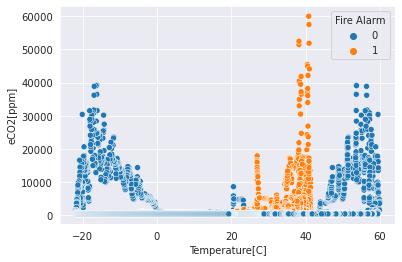

In [47]:
sns.scatterplot(data=smoke_df, x="Temperature[C]", y="eCO2[ppm]", hue="Fire Alarm")

For our second graph, we plotted the distribution of humidity and if there was a fire as separate bars on the graph.

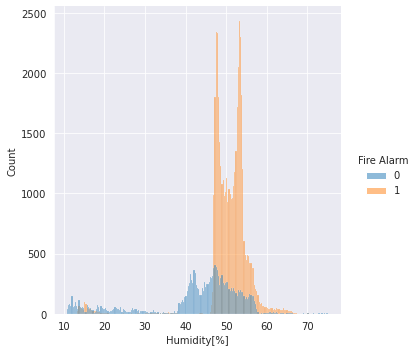

In [48]:
sns.displot(smoke_df, x="Humidity[%]", hue="Fire Alarm")

For our last graph, we plotted the concentration of particulates less than 1.0 micrometers and if the concentration was a fire or not.

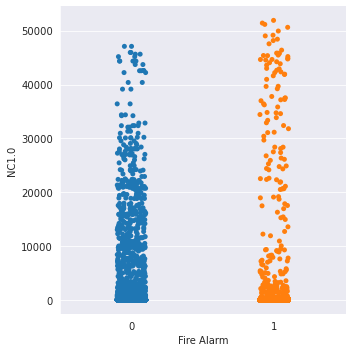

In [49]:
sns.catplot(data=smoke_df, x="Fire Alarm", y="NC1.0")

### Data Analysis and Summary
We can conclude several things from each of the plots we graphed.
* For the first graph, we can see that there is an obvious correlation between temperature and CO2 concentration and if there is a fire, with higher CO2 concentrations and temperature between ~30-40 degrees C being more likely to have a fire present.
* For the second graph, we can see that most fires occur in conditions with around 45-60% humidity.
* For the third graph, we can see that a higher concentration of particulates that are smaller than 1.0 micrometers are more highly associated with fires.

### Splitting the Data
First we set up our target (y) and our feature (x) variables. The copy method, referenced from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html), was used to ensure we have an original copy of the database, so we can add and remove features later.

In [50]:
y = smoke_df["Fire Alarm"].copy()
x = smoke_df.copy()
x.drop(columns=["Fire Alarm", "UTC"], inplace=True)

Then we actually split the data into our training and testing sets.

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

### Creating a sklearn Model
We are going to make a decision tree classifier model for this data set. It was at this point we realized that the model doesn't play nice with datetime formats, so we dropped that column entirely in the code above.

In [52]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### Assessing the Performance
First we ran the score() method on our tree to see what the mean accuracy of our testing data was. This resulted in a very high score (99.99%), but not perfect. This tells us that our model is very accurate when predicting if there is a fire present.

In [53]:
tree.score(x_test, y_test)

0.9998935547394753

Then we ran the f1_score() method on the results of our tree, first by getting a set of predictions, and then giving the function the actual results and what the tree predicted. F1 score is essentially a mean that takes into account both precision and recall of the model. The best score is 1 and the worst is 0, so our model does well in both categories. [This](https://stackoverflow.com/questions/49545599/how-to-turn-a-pandas-column-into-array-and-transpose-it) was used as reference to convert the dataframe into an array.

In [54]:
y_pred = tree.predict(x_test)
y_test_array = y_test.to_numpy()
f1_score(y_test_array, y_pred)

0.9999251160700914

### Decision Boundary
Initially we were very confused on this section, but after clarification during Thursday's class (10/27), we figured out what we needed to do for this section. We found [this](https://www.kdnuggets.com/2020/03/decision-boundary-series-machine-learning-models.html) resource similar to the one mentioned in class and concluded that we cannot plot the decision boundary using our data set because it has more than 2 features.

### Add a new Feature
Looking at our data, the three columns that contain 'NC' in their name would be good to sum up together as one column to get the total amount of particulate matter. First we create the new total column.

In [55]:
smoke_df["NC_Total"] = smoke_df["NC0.5"] + smoke_df["NC1.0"] + smoke_df["NC2.5"]
smoke_df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,NC_Total
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0.000
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0,0.000
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0,0.000
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0,0.000
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,2022-06-13 14:20:47,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0,5.008
62626,2022-06-13 14:20:48,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0,4.847
62627,2022-06-13 14:20:49,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0,4.581
62628,2022-06-13 14:20:50,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0,4.545


Then we remove the three columns that this new feature is based on.

In [56]:
smoke_df.drop(columns=["NC0.5", "NC1.0", "NC2.5"], inplace=True, axis="columns")
smoke_df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,Fire Alarm,NC_Total
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0,0.000
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0,0.000
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0,0.000
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0,0.000
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,2022-06-13 14:20:47,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,0,5.008
62626,2022-06-13 14:20:48,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,0,4.847
62627,2022-06-13 14:20:49,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,0,4.581
62628,2022-06-13 14:20:50,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,0,4.545


From here, we remake the training and testing data variables using the new feature.

In [57]:
y = smoke_df["Fire Alarm"].copy()
x = smoke_df.copy()
x.drop(columns=["Fire Alarm", "UTC"], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

### Finding a new Classification Model
We first created a few variables to mess around with, nums to change what the maximum depth of the tree can be, and the criterion tuple, to change how we measure the quality of the splits. We put these into a GridSearchCV object along with a new DecisionTreeClassifier and fit the data.

In [58]:
nums = range(1,11)
params = {"criterion": ("gini", "entropy", "log_loss"), "max_depth": nums}
base_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(base_tree, params)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 11)})

We then put the results into a dataframe. From what we can see using the value of rank_test_score, our log_loss model with the max depth set to 10 performed the best, with a mean score of 99.99% across all the testing data. While not displayed here, with the original data set we had a three-way tie between two gini models and an entropy model with max depths set to 8,10 and 8 respectively. It is interesting to see how merging all the particulate columns together affected which model was most effective.

In [59]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038208,0.000763,0.002620,0.000176,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.878778,0.883098,0.887318,0.874088,0.879106,0.880477,0.004455,28
1,0.070834,0.001122,0.002773,0.000143,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.928498,0.932482,0.913435,0.933622,0.930657,0.927739,0.007359,25
2,0.099728,0.001594,0.002628,0.000224,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.989508,0.986656,0.990192,0.987797,0.983691,0.987569,0.002305,22
3,0.123361,0.001702,0.002477,0.000055,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.989623,0.986884,0.994297,0.987568,0.991332,0.989941,0.002683,19
4,0.142923,0.002487,0.002563,0.000216,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.994868,0.989393,0.994868,0.993499,0.997149,0.993955,0.002565,18
5,0.158434,0.004744,0.002595,0.000125,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.997149,0.998517,0.999658,0.994982,0.998974,0.997856,0.001655,17
6,0.161502,0.001606,0.002534,0.000076,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.999316,1.000000,0.999886,0.999202,0.999088,0.999498,0.000372,16
7,0.158440,0.002388,0.002491,0.000090,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.999316,1.000000,1.000000,0.999544,0.999088,0.999589,0.000365,13
8,0.127752,0.012243,0.002056,0.000103,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.999430,1.000000,1.000000,0.999544,0.999544,0.999703,0.000246,7
9,0.102689,0.003564,0.001773,0.000085,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.999430,0.999886,1.000000,0.999544,0.999544,0.999681,0.000221,11


In addition, we scored the GridSearchCV object itself and found it to be very accurate on predicting if there is a fire present (99.99%).

In [60]:
grid_search.score(x_test, y_test)

0.9999467773697376

### Model Recommendations
We would recommend both models for real-life prediction due to their high accuracy in predicting if there is a fire present. The second model has very slightly better predictions (0.00002), but both are accurate enough to predict with the data they are given. This dataset has a wide set of conditions and a large amount of samples, so we are confident that this model would be able to predict if there is a fire with high certainty.

### Things we Learned
* How to use different performance metrics in sklearn.
* What the score() method actually does and how it differs slightly depending on which kind of model you are using.
* How to interpret the results given from a GridSearchCV.

### Questions
* What is the difference between the three criterion used in the GridSearchCV?
* How does f1_score() differ from the normal score() given with the DecisionTreeClassifier?
* Why are there three different columns for number concentration in the data set (0.5, 1.0, 2.5) originally?

### References
* [Link to Sections in Markdown](https://stackoverflow.com/questions/2822089/how-to-link-to-part-of-the-same-document-in-markdown): Used for linking to the sections in this document
* [Data set used](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset): The dataset we used, along with what each column means
* [Pandas to_datetime() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html): Used to check what the method was to convert data to datetime
* [Pandas drop() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html): Used to check how to drop a column
* [Seaborn documentation](https://seaborn.pydata.org/tutorial.html): Used to check how to make each of the graphs
* [sklearn Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html): Received from Becca Lind to be used in the section for metrics
* [Pandas copy() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html): Used to make a deep copy of the dataframe
* [Column to array](https://stackoverflow.com/questions/49545599/how-to-turn-a-pandas-column-into-array-and-transpose-it): Used to convert a column in a dataframe into an array
* [Decision Boundaries](https://www.kdnuggets.com/2020/03/decision-boundary-series-machine-learning-models.html): Used to confirm we cannot plot the decision boundary